In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
import matplotlib as mpl
import itertools
%matplotlib notebook

datadirec = '/Volumes/lab-goehringn/home/users/blandt/ModelData/goehring_kant_koff_low_kon/'

In [2]:
dosages = [0.2, 0.4, 0.6, 0.8, 1]
p1_range = (-3, 0)  # kant
p2_range = (-4, -2)  # koff

aspect = (p1_range[1] - p1_range[0]) / (p2_range[1] - p2_range[0])

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

def minor_ticks(ax, xrange, yrange):
    minor_x_ticks = np.array([])
    for i in range(xrange[0], xrange[1]):
        a = np.log10(np.linspace(10 ** i, 10 ** (i + 1), 10))
        minor_x_ticks = np.append(minor_x_ticks, a)    
    ax.set_xticks(minor_x_ticks, minor=True)
    minor_y_ticks = np.array([])
    for i in range(yrange[0], yrange[1]):
        a = np.log10(np.linspace(10 ** i, 10 ** (i + 1), 10))
        minor_y_ticks = np.append(minor_y_ticks, a)    
    ax.set_yticks(minor_y_ticks, minor=True)

### Dosage plot

In [3]:
def dosage_plot(n):

    # Import data
    res0 = (np.loadtxt(datadirec + str(n) + '/Res.txt') == 2).astype(float)
    res1 = (np.loadtxt(datadirec + str(n + 1) + '/Res.txt') == 2).astype(float)
    res2 = (np.loadtxt(datadirec + str(n + 2) + '/Res.txt') == 2).astype(float)
    res3 = (np.loadtxt(datadirec + str(n + 3) + '/Res.txt') == 2).astype(float)
    res4 = (np.loadtxt(datadirec + str(n + 4) + '/Res.txt') == 2).astype(float)
    restotal = res0 + res1 + res2 + res3 + res4
    restotal[restotal == 0] = np.nan

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(restotal.T, origin='lower', vmin=1, vmax=4, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap='cividis')
    
    minor_ticks(ax, p1_range, p2_range)
    ax.set_yticks([-4, -3, -2])
    ax.xaxis.set_major_formatter(fake_log)
    ax.yaxis.set_major_formatter(fake_log)  
    ax.set_xlabel(r'$k_{ant}$')
    ax.set_ylabel(r'$k_{off}$')
    ax.tick_params(axis='both', labelsize=8)
    ax.set_title('Tolerence to imbalance', fontsize=9)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

<IPython.core.display.Javascript object>


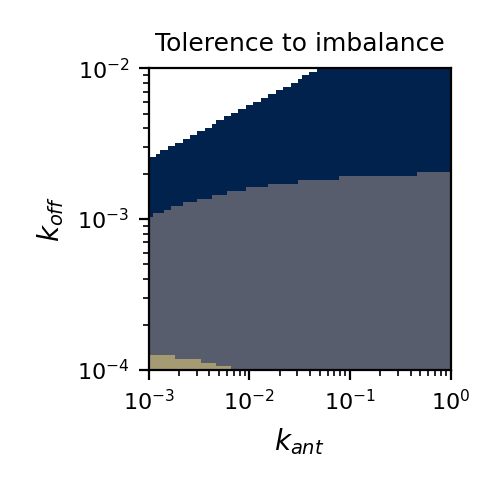

In [4]:
fig, ax = dosage_plot(n=0)
# fig.savefig('Figs/dosage_plot.png', dpi=600, transparent=True)

### ASI plot

In [5]:
def asi_plot(n):

    # Import data
    res = np.loadtxt(datadirec + str(n) + '/Res.txt')
    res[res == 1] = np.nan

    # Plot
    fig, ax = plt.subplots()
    
    ax.imshow(res.T, origin='lower', vmin=1, vmax=6, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap='viridis')
    
    minor_ticks(ax, p1_range, p2_range)
    ax.set_yticks([-4, -3, -2])
    ax.xaxis.set_major_formatter(fake_log)
    ax.yaxis.set_major_formatter(fake_log)  
    ax.set_xlabel(r'$k_{ant}$')
    ax.set_ylabel(r'$k_{off}$')
    ax.tick_params(axis='both', labelsize=8)
    ax.set_title('Asymmetry index (ASI)', fontsize=9)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

<IPython.core.display.Javascript object>


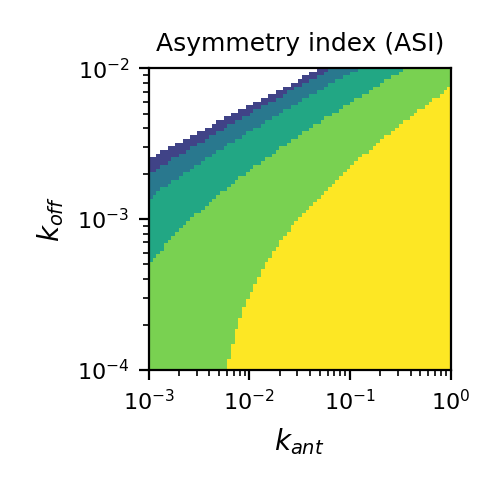

In [6]:
fig, ax = asi_plot(n=len(dosages))
# for y, c in zip([-2.2, -1.83, -1.65], ['0', '0.4', '0.8']):
#     ax.scatter(-2, y, c=c, s=25, edgecolors='k')
# fig.savefig('Figs/asi_plot.png', dpi=600, transparent=True)

### Trigger plot

In [7]:
def trigger_plot(n1, n2):

    # Import data
    res1 = (np.loadtxt(datadirec + str(n1) + '/Res.txt') == 2).astype(float)
    res2 = (np.loadtxt(datadirec + str(n2) + '/Res.txt') == 2).astype(float)
    restotal = res1 + res2
    restotal[restotal == 0] = np.nan

    # Set up cmap
    colours = {1: 'green', 2: 'grey'}
    cmap = mpl.colors.ListedColormap(list(colours.values()))
    norm = mpl.colors.BoundaryNorm(list(colours.keys()) + [100], cmap.N)

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(restotal.T, origin='lower', vmin=0, vmax=2, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap=cmap, norm=norm,
              alpha=0.5)
    
    minor_ticks(ax, p1_range, p2_range)
    ax.set_yticks([-4, -3, -2])
    ax.xaxis.set_major_formatter(fake_log)
    ax.yaxis.set_major_formatter(fake_log)  
    ax.set_xlabel(r'$k_{ant}$')
    ax.set_ylabel(r'$k_{off}$')
    ax.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(2.5, 2.5)
#     ax.set_title('Symmetry breaking', fontsize=9)
    fig.tight_layout()
    return fig, ax

<IPython.core.display.Javascript object>


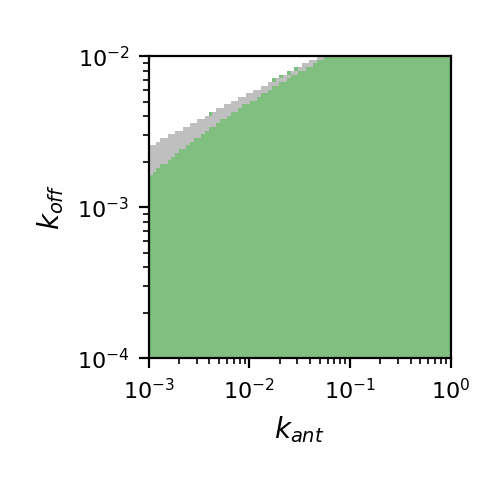

/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


In [8]:
fig, ax = trigger_plot(n1=len(dosages) - 1, n2=len(dosages) + 1)
# fig.savefig('Figs/trigger_plot.png', dpi=600, transparent=True)